In [1]:
cd ..

/home/msi/projects/diplomka/notebooks


In [2]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper")

In [3]:
from traced_v2.models.normal import NormalModel

In [4]:
import numpy as np

In [5]:
data = np.random.normal(2, 6, 100)

In [6]:
model_a = NormalModel("a", "b", gamma=1)
model_b = NormalModel("a", "b", gamma=0.5)
model_c = NormalModel("a", "b", gamma=0.3)

In [7]:
for i, x in enumerate(data):
    model_a.log(i, x)
    model_b.log(i, x)
    model_c.log(i, x)

In [8]:
import matplotlib.pyplot as plt

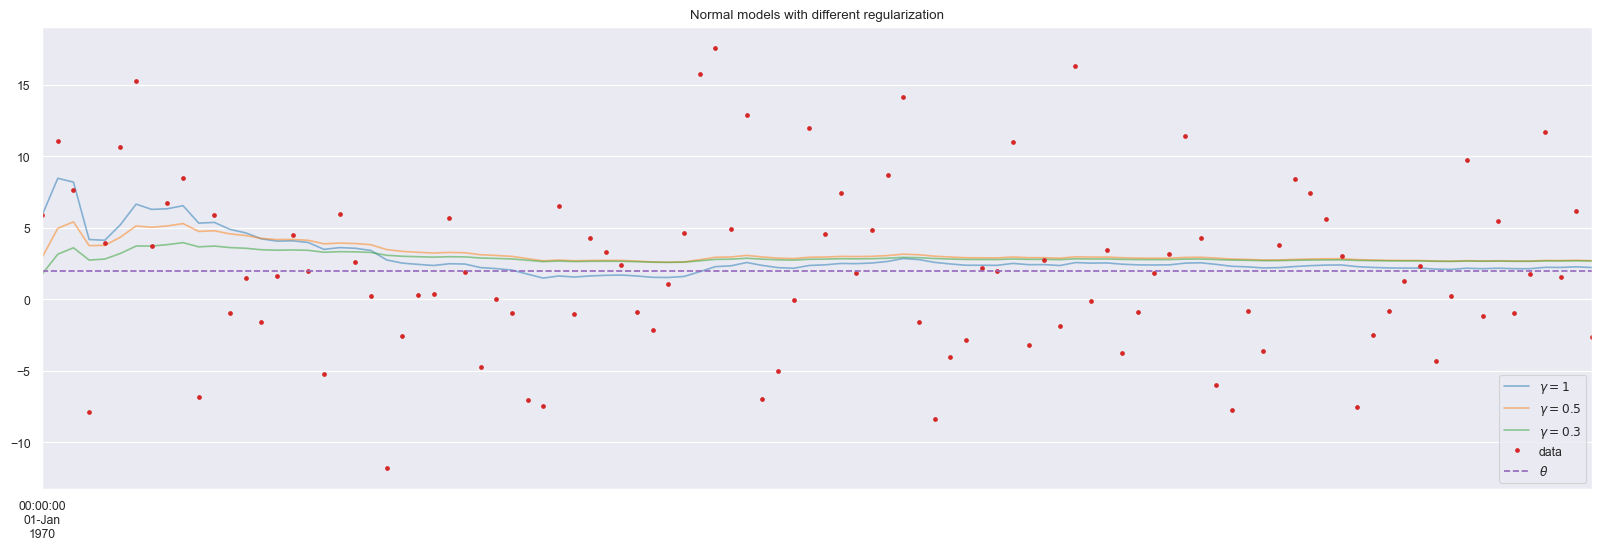

In [9]:
fig=  plt.figure(figsize=(20, 6))

model_a.to_frame()['expected_values'].plot(axes=fig.gca(), label="$\\gamma=1$", alpha=0.5)
model_b.to_frame()['expected_values'].plot(axes=fig.gca(), label="$\\gamma=0.5$", alpha=0.5)
model_c.to_frame()['expected_values'].plot(axes=fig.gca(), label="$\\gamma=0.3$", alpha=0.5)
plt.title("Normal models with different regularization")

plt.plot(data, marker='.', linestyle='None', label="data")
plt.plot([2]*len(data), linestyle='--', label="$\\theta$")
plt.legend()

In [10]:
from traced_v2.models.poisson import PoissonModel

In [11]:
import scipy
import scipy.stats

In [12]:
data = scipy.stats.poisson.rvs(5, loc=0, size=100)

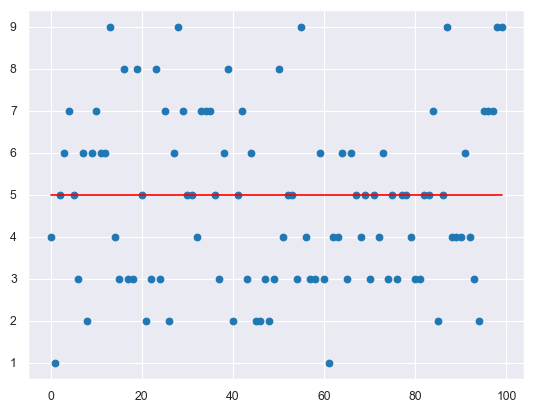

In [13]:
plt.scatter(np.arange(len(data)), data)
plt.plot([5]*len(data), c='r')

In [14]:
model_a = PoissonModel("a", "b", alpha_0=20, gamma=1)
model_b = PoissonModel("a", "b", alpha_0=20, gamma=0.5)
model_c = PoissonModel("a", "b", alpha_0=20, gamma=0.3)

In [15]:
for i, x in enumerate(data):
    model_a.log(i, x)
    model_b.log(i, x)
    model_c.log(i, x)

In [16]:
model_a.to_frame().reset_index()

,index,observed_values,expected_values,probabilities,anomalies
0,1970-01-01 00:00:00.000,4,12.000000,0.005309,True
1,1970-01-01 00:00:00.001,1,8.333333,0.002003,True
2,1970-01-01 00:00:00.002,5,7.500000,0.109375,False
3,1970-01-01 00:00:00.003,6,7.200000,0.144458,False
4,1970-01-01 00:00:00.004,7,7.166667,0.148712,False
...,...,...,...,...,...
95,1970-01-01 00:00:00.095,7,4.876289,0.099186,False
96,1970-01-01 00:00:00.096,7,4.897959,0.100120,False
97,1970-01-01 00:00:00.097,7,4.919192,0.101029,False
98,1970-01-01 00:00:00.098,9,4.960000,0.035113,True


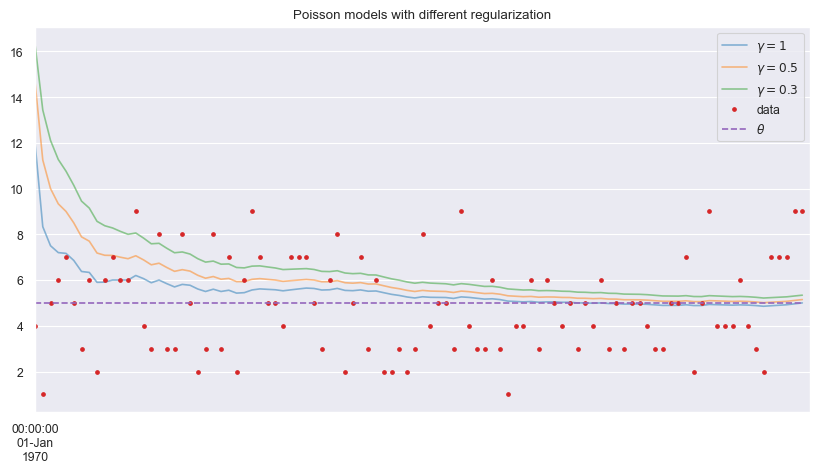

In [17]:
fig=  plt.figure(figsize=(10, 5))

model_a.to_frame()['expected_values'].plot(axes=fig.gca(), label="$\\gamma=1$", alpha=0.5)
model_b.to_frame()['expected_values'].plot(axes=fig.gca(), label="$\\gamma=0.5$", alpha=0.5)
model_c.to_frame()['expected_values'].plot(axes=fig.gca(), label="$\\gamma=0.3$", alpha=0.5)

plt.plot(data, marker='.', linestyle='None', label="data")
plt.plot([5]*len(data), linestyle='--', label="$\\theta$")
plt.xlim(0, len(data))
plt.legend()
plt.title("Poisson models with different regularization")
plt.show()

In [18]:
from traced_v2.models.multinomial import MultinomialModel

In [19]:
data = np.argmax(scipy.stats.multinomial.rvs(p=[.1,  .3, .6], n=1, size=100), axis=1)

In [20]:
data

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2])

In [21]:
model_a = MultinomialModel("a", "b", gamma=1)
model_b = MultinomialModel("a", "b", gamma=0.75)
model_c = MultinomialModel("a", "b", gamma=0.5)

In [22]:
for i, x in enumerate(data):
    model_a.log(i, x)
    model_b.log(i, x)
    model_c.log(i, x)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


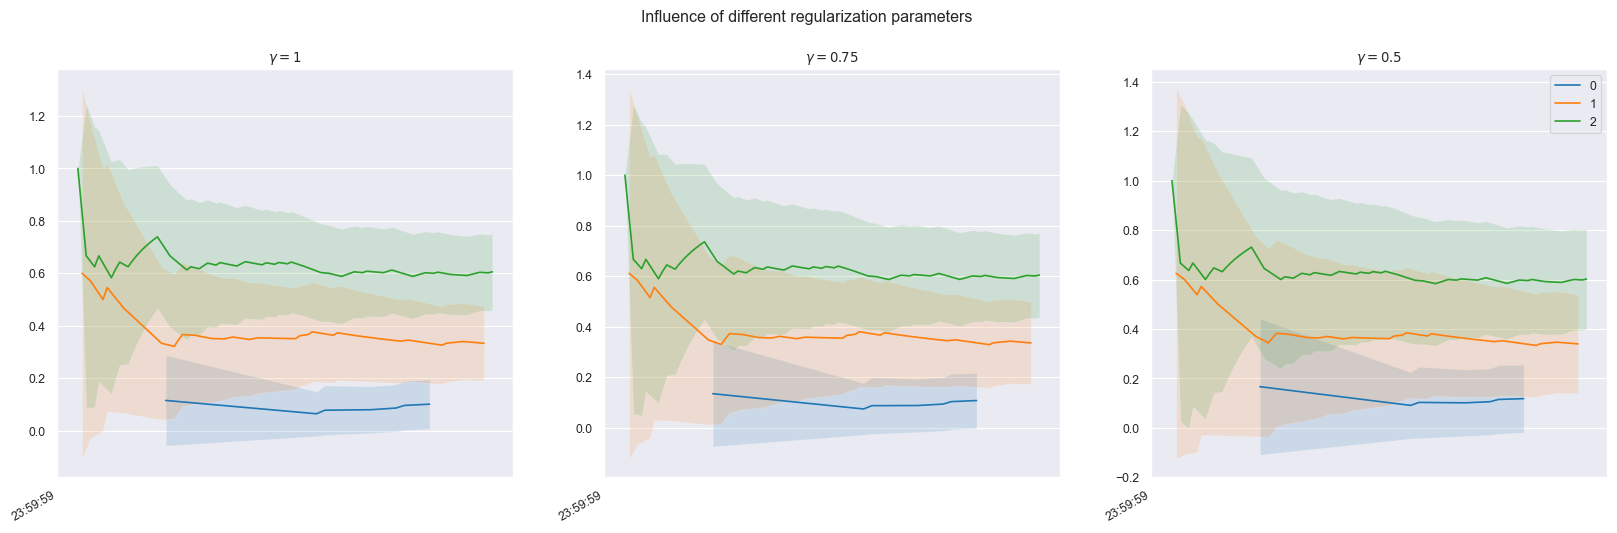

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6));
model_a.plot(ax=axes[0]);
model_b.plot(ax=axes[1]);
model_c.plot(ax=axes[2]);

axes[0].set_title('$\gamma=1$');
axes[1].set_title('$\gamma=0.75$');
axes[2].set_title('$\gamma=0.5$');

fig.suptitle("Influence of different regularization parameters");
plt.show()